In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [3]:
pwd

'/Users/shankar'

In [4]:
df_train = pd.read_csv("/Users/shankar/Data/Project/BBC News Train.csv")
df_train

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [5]:
df_test = pd.read_csv("/Users/shankar/Data/Project/BBC News Test.csv")
df_test

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


In [6]:
df_train['category_id'] = df_train['Category'].factorize()[0]
df_train.groupby('Category').category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

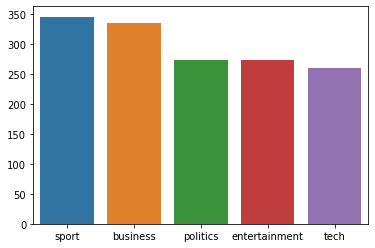

In [7]:
category = df_train['Category'].value_counts()
sns.barplot(category.index, category.values);

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')

In [10]:
features = tfidf.fit_transform(df_train.Text).toarray()

In [11]:
labels = df_train.category_id
labels

0       0
1       0
2       0
3       1
4       0
       ..
1485    4
1486    4
1487    0
1488    1
1489    1
Name: category_id, Length: 1490, dtype: int64

In [12]:
category_df = {'business':0, 'tech':1, 'politics':2, 'sport':3, 'entertainment':4}
category_df

{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [15]:
model = RandomForestClassifier()

In [16]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([4, 2, 2, 1, 3, 0, 1, 4, 0, 1, 2, 4, 0, 3, 1, 1, 0, 3, 2, 0, 1, 4,
       3, 0, 3, 1, 0, 3, 1, 0, 3, 0, 0, 2, 3, 1, 2, 0, 4, 1, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 0, 3, 3, 0, 3, 2, 4, 4, 2, 0, 4, 1, 0, 4, 1, 1, 1,
       0, 1, 2, 2, 2, 3, 3, 3, 4, 4, 0, 2, 0, 0, 0, 3, 3, 3, 0, 4, 3, 0,
       0, 1, 4, 2, 2, 1, 0, 2, 1, 1, 4, 2, 4, 2, 3, 3, 1, 3, 2, 3, 0, 1,
       1, 0, 1, 4, 1, 0, 2, 0, 4, 0, 2, 3, 0, 2, 0, 0, 1, 1, 2, 4, 0, 3,
       4, 3, 0, 2, 0, 4, 0, 4, 0, 4, 1, 3, 4, 2, 0, 1, 2, 2, 3, 0, 1, 3,
       4, 1, 1, 3, 1, 3, 3, 2, 0, 0, 2, 2, 1, 3, 3, 1, 2, 1, 1, 4, 0, 1,
       4, 3, 0, 0, 3, 3, 1, 4, 4, 0, 1, 2, 4, 2, 3, 3, 2, 1, 3, 3, 2, 3,
       3, 0, 4, 2, 3, 4, 0, 3, 1, 1, 0, 0, 3, 1, 0, 4, 3, 2, 2, 3, 1, 2,
       3, 1, 0, 0, 4, 1, 0, 2, 2, 2, 2, 3, 3, 0, 0, 1, 0, 3, 3, 2, 2, 4,
       4, 4, 0, 0, 4, 4, 3, 4, 0, 2, 1, 3, 2, 1, 4, 3, 1, 0, 0, 2, 4, 1,
       1, 3, 3, 0, 2, 4, 3, 3, 1, 3, 3, 2, 3, 3, 0, 2, 4, 0, 0, 2, 0, 0,
       0, 1, 2, 4, 0, 0, 0, 0, 2, 4, 1, 4, 3, 0, 2,

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9695121951219512

In [19]:
text = df_train.at[15,"Text"]
text

'wenger signs new deal arsenal manager arsene wenger has signed a new contract to stay at the club until may 2008.  wenger has ended speculation about his future by agreeing a long-term contract that takes him beyond the opening of arsenal s new stadium in two years. he said:  signing a new contract just rubber-stamps my desire to take this club forward and fulfil my ambitions.  i still have so much to achieve and my target is to drive this club on. these are exciting times for arsenal.   the 55-year-old frenchman told arsenal s website www.arsenal.com:  my intention has always been clear. i love this club and am very happy here.  wenger has won the title and the fa cup three times each during his reign. chairman peter hill-wood said:  we are absolutely delighted that arsene has signed an extension to his contract.  since his arrival in 1996  he has revolutionised the club both on and off the pitch.  as well as the six major honours he s won during his time here  arsene has been a lead

In [20]:
test_features = tfidf.transform([text])

In [21]:
prediction = model.predict(test_features)

In [22]:
id_to_category_df = {0: 'business', 1: 'tech', 2: 'politics', 3: 'sports', 4: 'entertainment'}

In [23]:
for i in range(len(prediction)):
    print(id_to_category_df[prediction[i]])

sports


In [24]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    MultinomialNB(),
    LogisticRegression(random_state=0)
]

In [28]:
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=2)
    for i, accuracy in enumerate(accuracies):
        entries.append((model_name, i, accuracy))

In [29]:
entries
cv_df = pd.DataFrame(entries, columns=['model_name', 'Cross-Validation-Set', 'accuracy'])
cv_df.head(10)

,model_name,Cross-Validation-Set,accuracy
0,RandomForestClassifier,0,0.809396
1,RandomForestClassifier,1,0.857718
2,KNeighborsClassifier,0,0.939597
3,KNeighborsClassifier,1,0.962416
4,MultinomialNB,0,0.955705
5,MultinomialNB,1,0.978523
6,LogisticRegression,0,0.965101
7,LogisticRegression,1,0.981208


<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

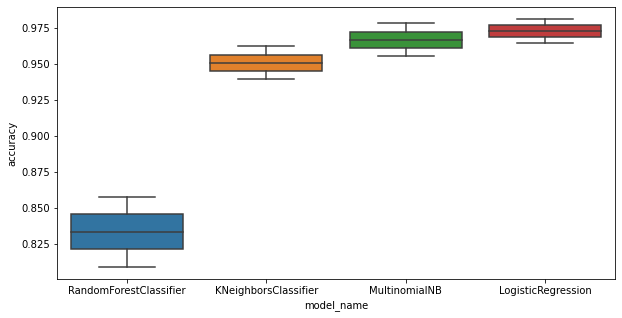

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot('model_name', 'accuracy', data=cv_df)